In [7]:

import copy
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import math
import matplotlib.pyplot as plt

from eightPuzzle import eightPuzzle
from bfs import breadthFirstSearch
from ids import iterativeDeepeningSearch
from ucs import uniformCostSearch
from heuristics import manhattanDistance, misplacedTiles
from aStar import aStar
from gready import gready
from node import Node

In [21]:
misplacedTiles([[1, 2, 4], 
[6, 5, 3] ,
[8, 7, 0]])

5

In [2]:
def plot(puzzle: eightPuzzle, ax=None, title=None, fs=20):
        if ax is None:
            _, ax = plt.subplots(1)
            
        gs = 3
        
        # draw border
        border = plt.Rectangle((0, 0), gs, gs, ec='k', fc='pink', lw=3)
        ax.add_patch(border)
        
        # draw tiles
        for i, tile in enumerate(puzzle.grid.flatten()):
            if tile == 0: continue
            col = 3 - 1 - i // 3
            row = i %  3
            cell = plt.Rectangle((row, col), 1, 1, fc='pink', ec='k', lw=3, alpha=0.4)
            ax.add_patch(cell)
            tileSq = plt.Rectangle((row + 0.15, col + 0.15), 0.7, 0.7, fc='hotpink', ec='k', lw=1, alpha=0.8)
            ax.add_patch(tileSq)
            ax.text(row + 0.5, col + 0.5, f"{tile}", color='k', fontsize=fs, va='center', ha='center')
        
        ax.axis('square')
        ax.axis('off')
        if title:
            ax.set_title(title, fontsize=fs)

In [6]:
s = [[7, 2, 4, 
5, 0, 6, 
8, 3, 1],

[7, 2, 4, 
5, 3, 6, 
8, 0, 1],

[7, 2, 4, 
5, 3, 6, 
8, 1, 0],

[7, 2, 4, 
5, 3, 0, 
8, 1, 6],

[7, 2, 4, 
5, 0, 3, 
8, 1, 6],

[7, 2, 4, 
0, 5, 3, 
8, 1, 6],

[0, 2, 4, 
7, 5, 3, 
8, 1, 6],

[2, 0, 4, 
7, 5, 3, 
8, 1, 6],

[2, 4, 0, 
7, 5, 3, 
8, 1, 6],

[2, 4, 3, 
7, 5, 0, 
8, 1, 6],

[2, 4, 3, 
7, 0, 5, 
8, 1, 6],

[2, 4, 3, 
7, 1, 5, 
8, 0, 6],

[2, 4, 3, 
7, 1, 5, 
0, 8, 6],

[2, 4, 3, 
0, 1, 5, 
7, 8, 6],

[2, 4, 3, 
1, 0, 5, 
7, 8, 6],

[2, 0, 3, 
1, 4, 5, 
7, 8, 6],

[0, 2, 3, 
1, 4, 5, 
7, 8, 6],

[1, 2, 3, 
0, 4, 5, 
7, 8, 6],

[1, 2, 3, 
4, 0, 5, 
7, 8, 6],

[1, 2, 3, 
4, 5, 0, 
7, 8, 6],

[1, 2, 3, 
4, 5, 6,
7, 8, 0]]

sSet = set()

def func(x, y):
    return 0

        
for x in s:
    puzzleGrid = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
    for i in range(3):
        for j in range(3):
            puzzleGrid[i][j] = int(x[i * 3 + j])
    node = Node(puzzleGrid, func)
    sSet.add(node)
print(len(sSet))

21


In [8]:
puzzleGrid = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]
board = [7,2,4,5,0,6,8,3,1]
for i in range(3):
    for j in range(3):
        puzzleGrid[i][j] = int(board[i * 3 + j])
puzzle = eightPuzzle(puzzleGrid)
solution = breadthFirstSearch(puzzle)

def printSolution(solution: list) -> None:
    fig, axes = plt.subplots(1, 1 + len(solution), figsize=(15, 3))
    plot(puzzle, axes[0], title='State', fs=8) 
    for i in range(len(solution)):
        puzzle.move(solution[i])
        plot(puzzle, axes[i+1], title=f'Step {i+1}', fs=8)
        
#printSolution(solution)

TypeError: __init__() takes 2 positional arguments but 3 were given

Error in callback <function _draw_all_if_interactive at 0x7f2f6d33e670> (for post_execute):


AttributeError: 'str' object has no attribute 'grid'

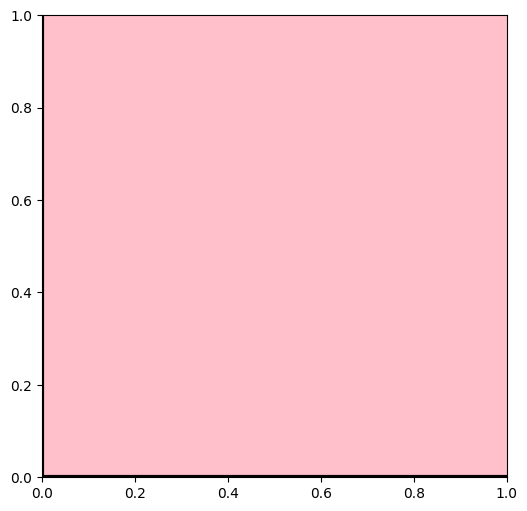

In [46]:
from matplotlib.animation import FuncAnimation
from IPython.display import clear_output

def create_animation(solution, 
                     figsize=(18, 6)):
    
    solution = solution
    
    def animate(i):
        # plot the board
        ax1.clear()
        state = solution[i]
        plot(state, ax1)
        
    figsize = (figsize[1], figsize[1])
    fig = plt.figure(figsize=figsize)
    ax1 = fig.add_subplot(1, 1, 1)

    anim = FuncAnimation(fig, animate, frames=range(len(solution)), repeat=True)    
    return anim

anim = create_animation(solution, figsize=(6, 6))


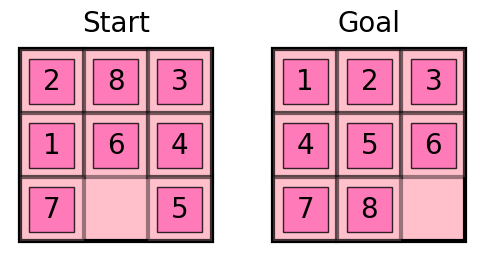

In [20]:
# define start state and goal state
start_state_tiles = np.array([[2, 8, 3], [1, 6, 4], [7, 0, 5]])
goal_state_tiles = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 0]])
start_state = eightPuzzle(start_state_tiles)
goal_state = eightPuzzle(goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot(start_state, axes[0], 'Start')
plot(goal_state, axes[1], 'Goal')
plt.show()